In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


daneCov = pd.read_csv(r'https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv')

In [3]:
#Pobieranie danych z csv z odpowiednich lat
daneCov2020=daneCov[daneCov['year']==2020]
daneCov2021=daneCov[daneCov['year']==2021]
daneCov2022=daneCov[daneCov['year']==2022]


In [5]:
#Zsumowanie przypadków oraz zgonow
sumaCov2020=daneCov2020.groupby(['countriesAndTerritories'],as_index=False)['cases','deaths'].sum()
sumaCov2021=daneCov2021.groupby(['countriesAndTerritories'],as_index=False)['cases','deaths'].sum()
sumaCov2022=daneCov2022.groupby(['countriesAndTerritories'],as_index=False)['cases','deaths'].sum()

#Obliczenie sredniej populacji w danym roku
sredPopCov2020=daneCov2020.groupby(['countriesAndTerritories'],as_index=False).mean()
sredPopCov2021=daneCov2021.groupby(['countriesAndTerritories'],as_index=False).mean()
sredPopCov2022=daneCov2022.groupby(['countriesAndTerritories'],as_index=False).mean()

#Połączenie 
Covid2020=pd.merge(sumaCov2020,sredPopCov2020[['countriesAndTerritories','popData2020']],on='countriesAndTerritories',how='left')
Covid2021=pd.merge(sumaCov2021,sredPopCov2021[['countriesAndTerritories','popData2020']],on='countriesAndTerritories',how='left')
Covid2022=pd.merge(sumaCov2022,sredPopCov2022[['countriesAndTerritories','popData2020']],on='countriesAndTerritories',how='left')

#Obliczenie przypadków zachorowań na 1000 mieszkancow
Covid2020['casesper1k20']=((Covid2020['cases']/(Covid2020['popData2020']))*1000).round(2)
Covid2021['casesper1k21']=((Covid2021['cases']/(Covid2021['popData2020']))*1000).round(2)
Covid2022['casesper1k22']=((Covid2022['cases']/(Covid2022['popData2020']))*1000).round(2)

#Obliczenie zgonów na 1000 przypadków
Covid2020['deathper1k20']=((Covid2020['deaths']/(Covid2020['popData2020']))*1000).round(2)
Covid2021['deathper1k21']=((Covid2021['deaths']/(Covid2021['popData2020']))*1000).round(2)
Covid2022['deathper1k22']=((Covid2022['deaths']/(Covid2022['popData2020']))*1000).round(2)

#Połączenie danych w jeden data frame
AllCovid=pd.merge(pd.merge(Covid2020,Covid2021,on='countriesAndTerritories'),Covid2022,on='countriesAndTerritories')


C:\Users\Kuba\AppData\Local\Temp\ipykernel_6088\3518488667.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sumaCov2020=daneCov2020.groupby(['countriesAndTerritories'],as_index=False)['cases','deaths'].sum()
C:\Users\Kuba\AppData\Local\Temp\ipykernel_6088\3518488667.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sumaCov2021=daneCov2021.groupby(['countriesAndTerritories'],as_index=False)['cases','deaths'].sum()
C:\Users\Kuba\AppData\Local\Temp\ipykernel_6088\3518488667.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sumaCov2022=daneCov2022.groupby(['countriesAndTerritories'],as_index=False)['cases','deaths'].sum()


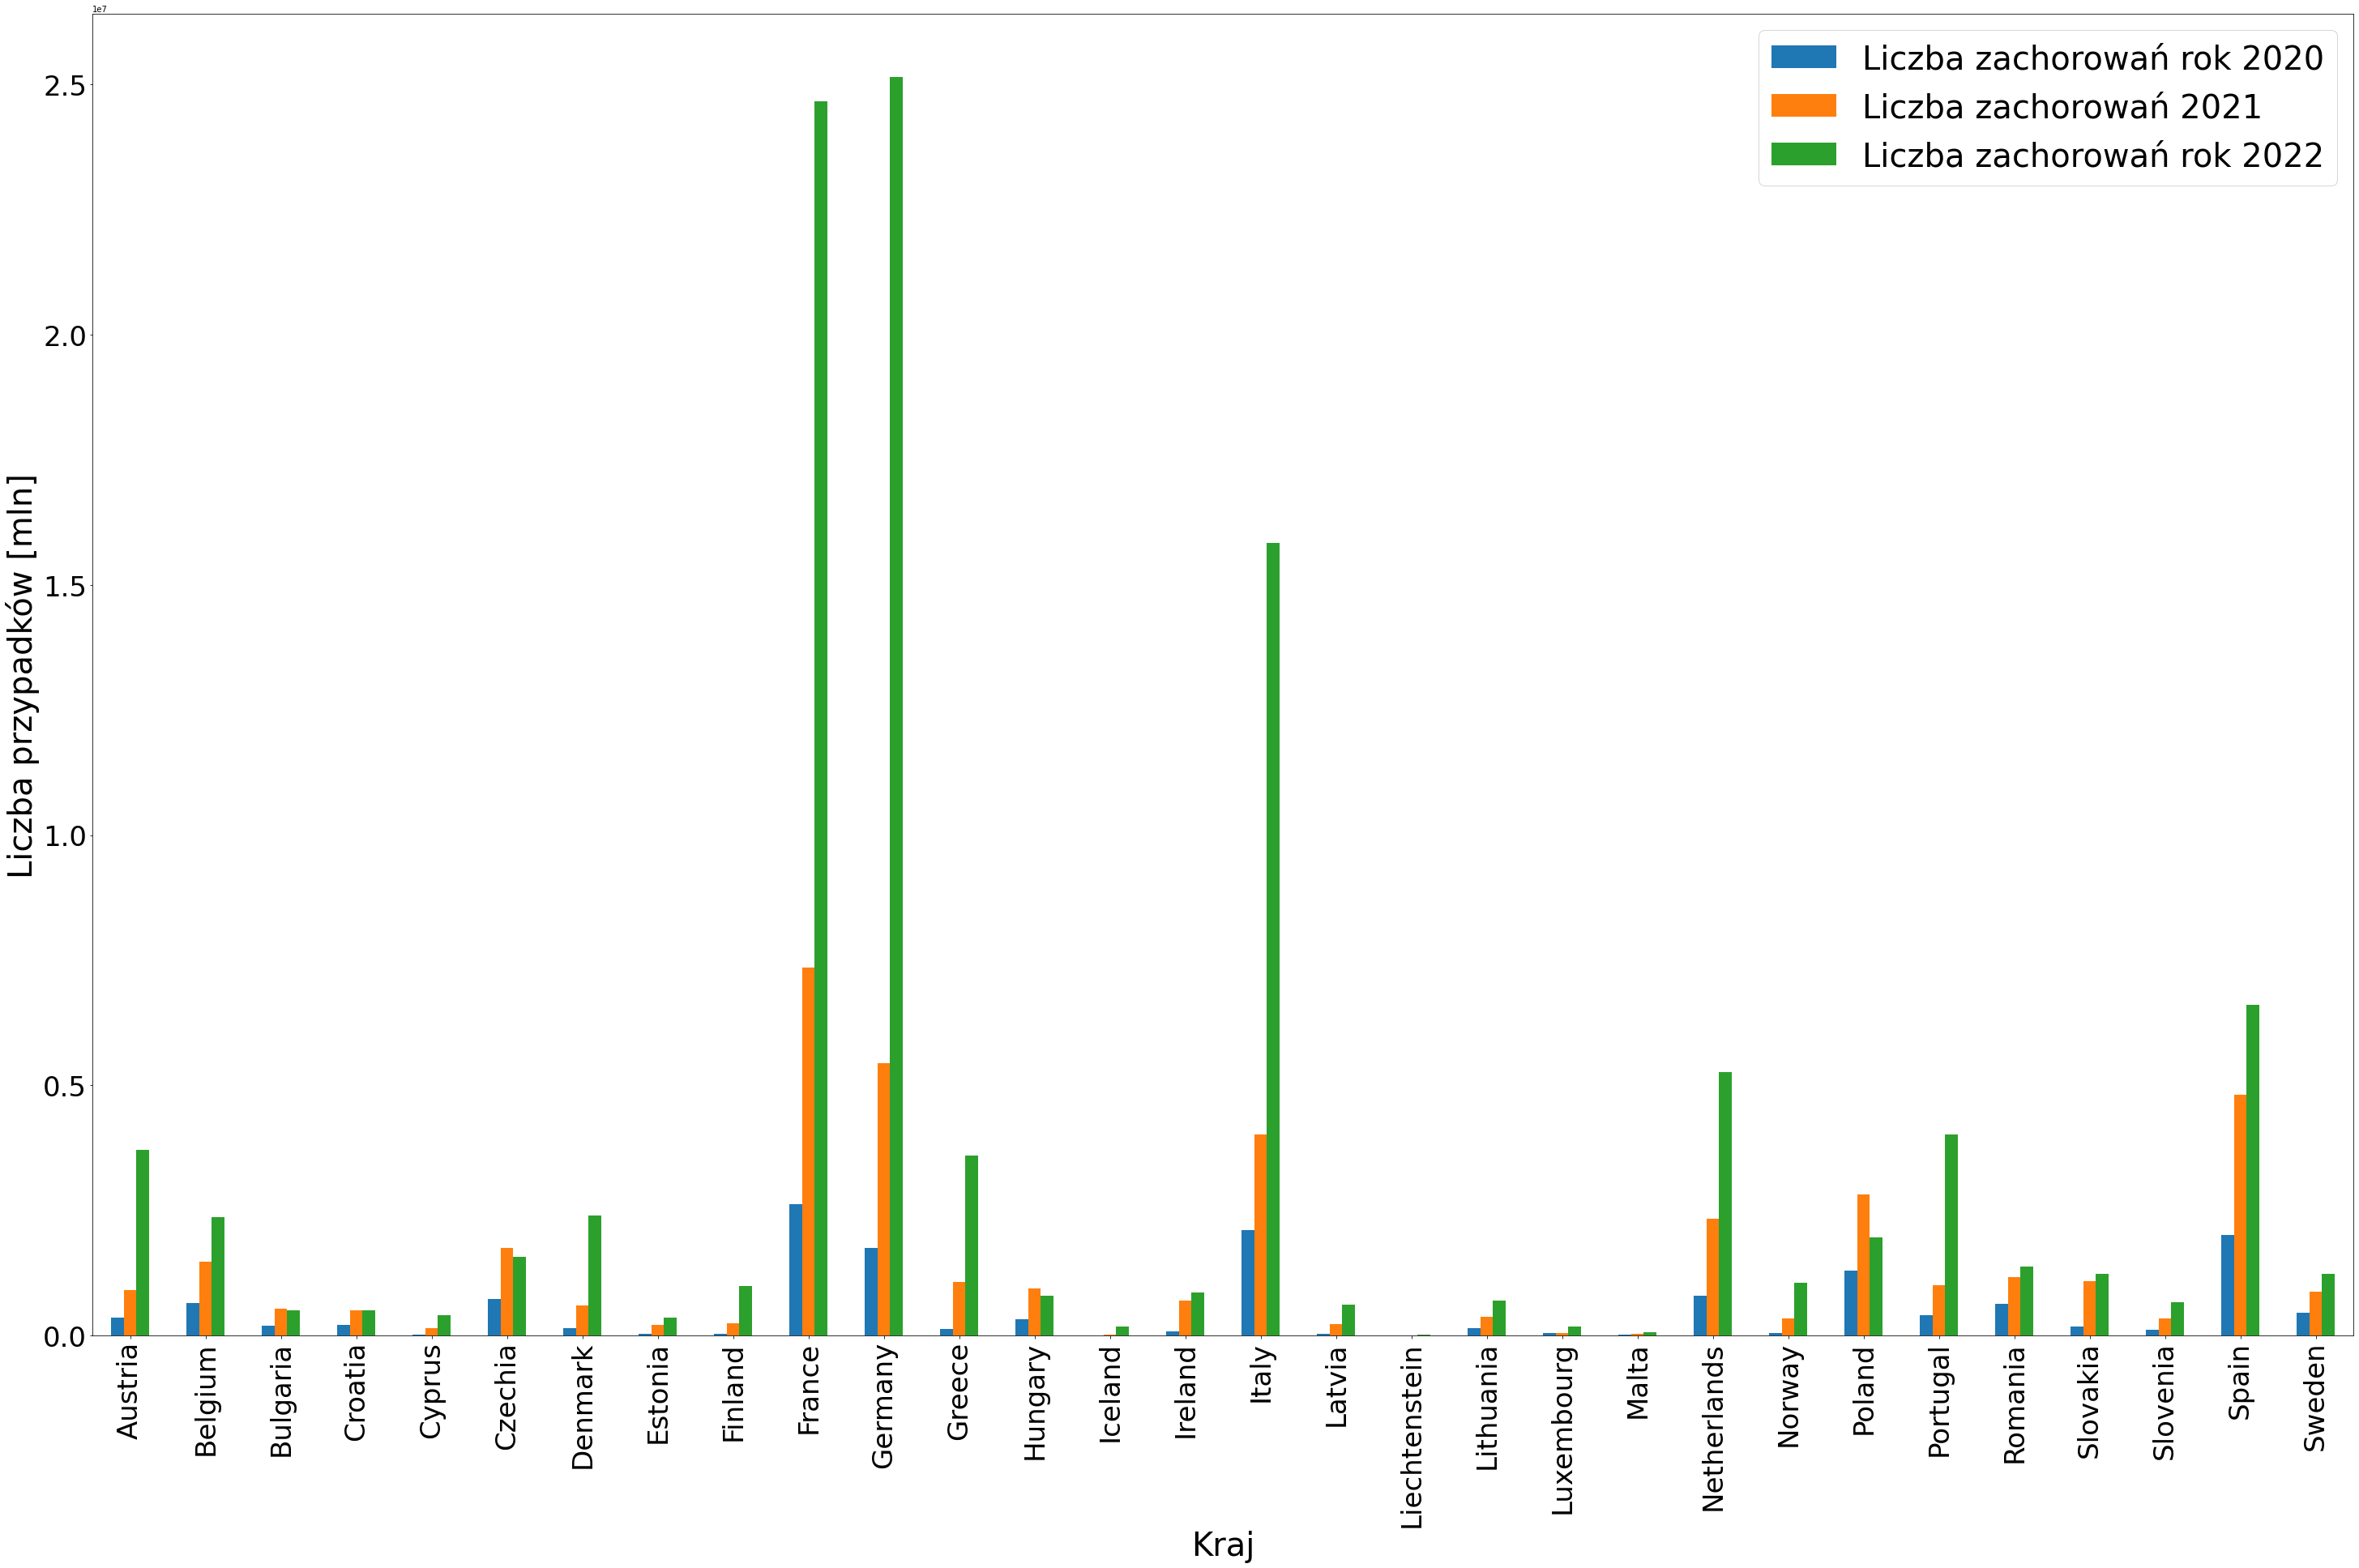

In [9]:
#stworzenie plot przedstawiajacego liczbe wszystkich przypadków covida w Europie w latach 2020-2022
AllCovid.plot(x='countriesAndTerritories',y=['cases_x','cases_y','cases'],kind='bar',figsize=(50,30))
plt.xlabel('Kraj')
plt.ylabel('Liczba przypadków [mln]')
plt.xticks(fontsize=34)
plt.yticks(fontsize=34)
axes = plt.gca()
plt.legend(['Liczba zachorowań rok 2020', 'Liczba zachorowań 2021','Liczba zachorowań rok 2022'], fontsize=40)
axes.xaxis.label.set_size(40)
axes.yaxis.label.set_size(40)

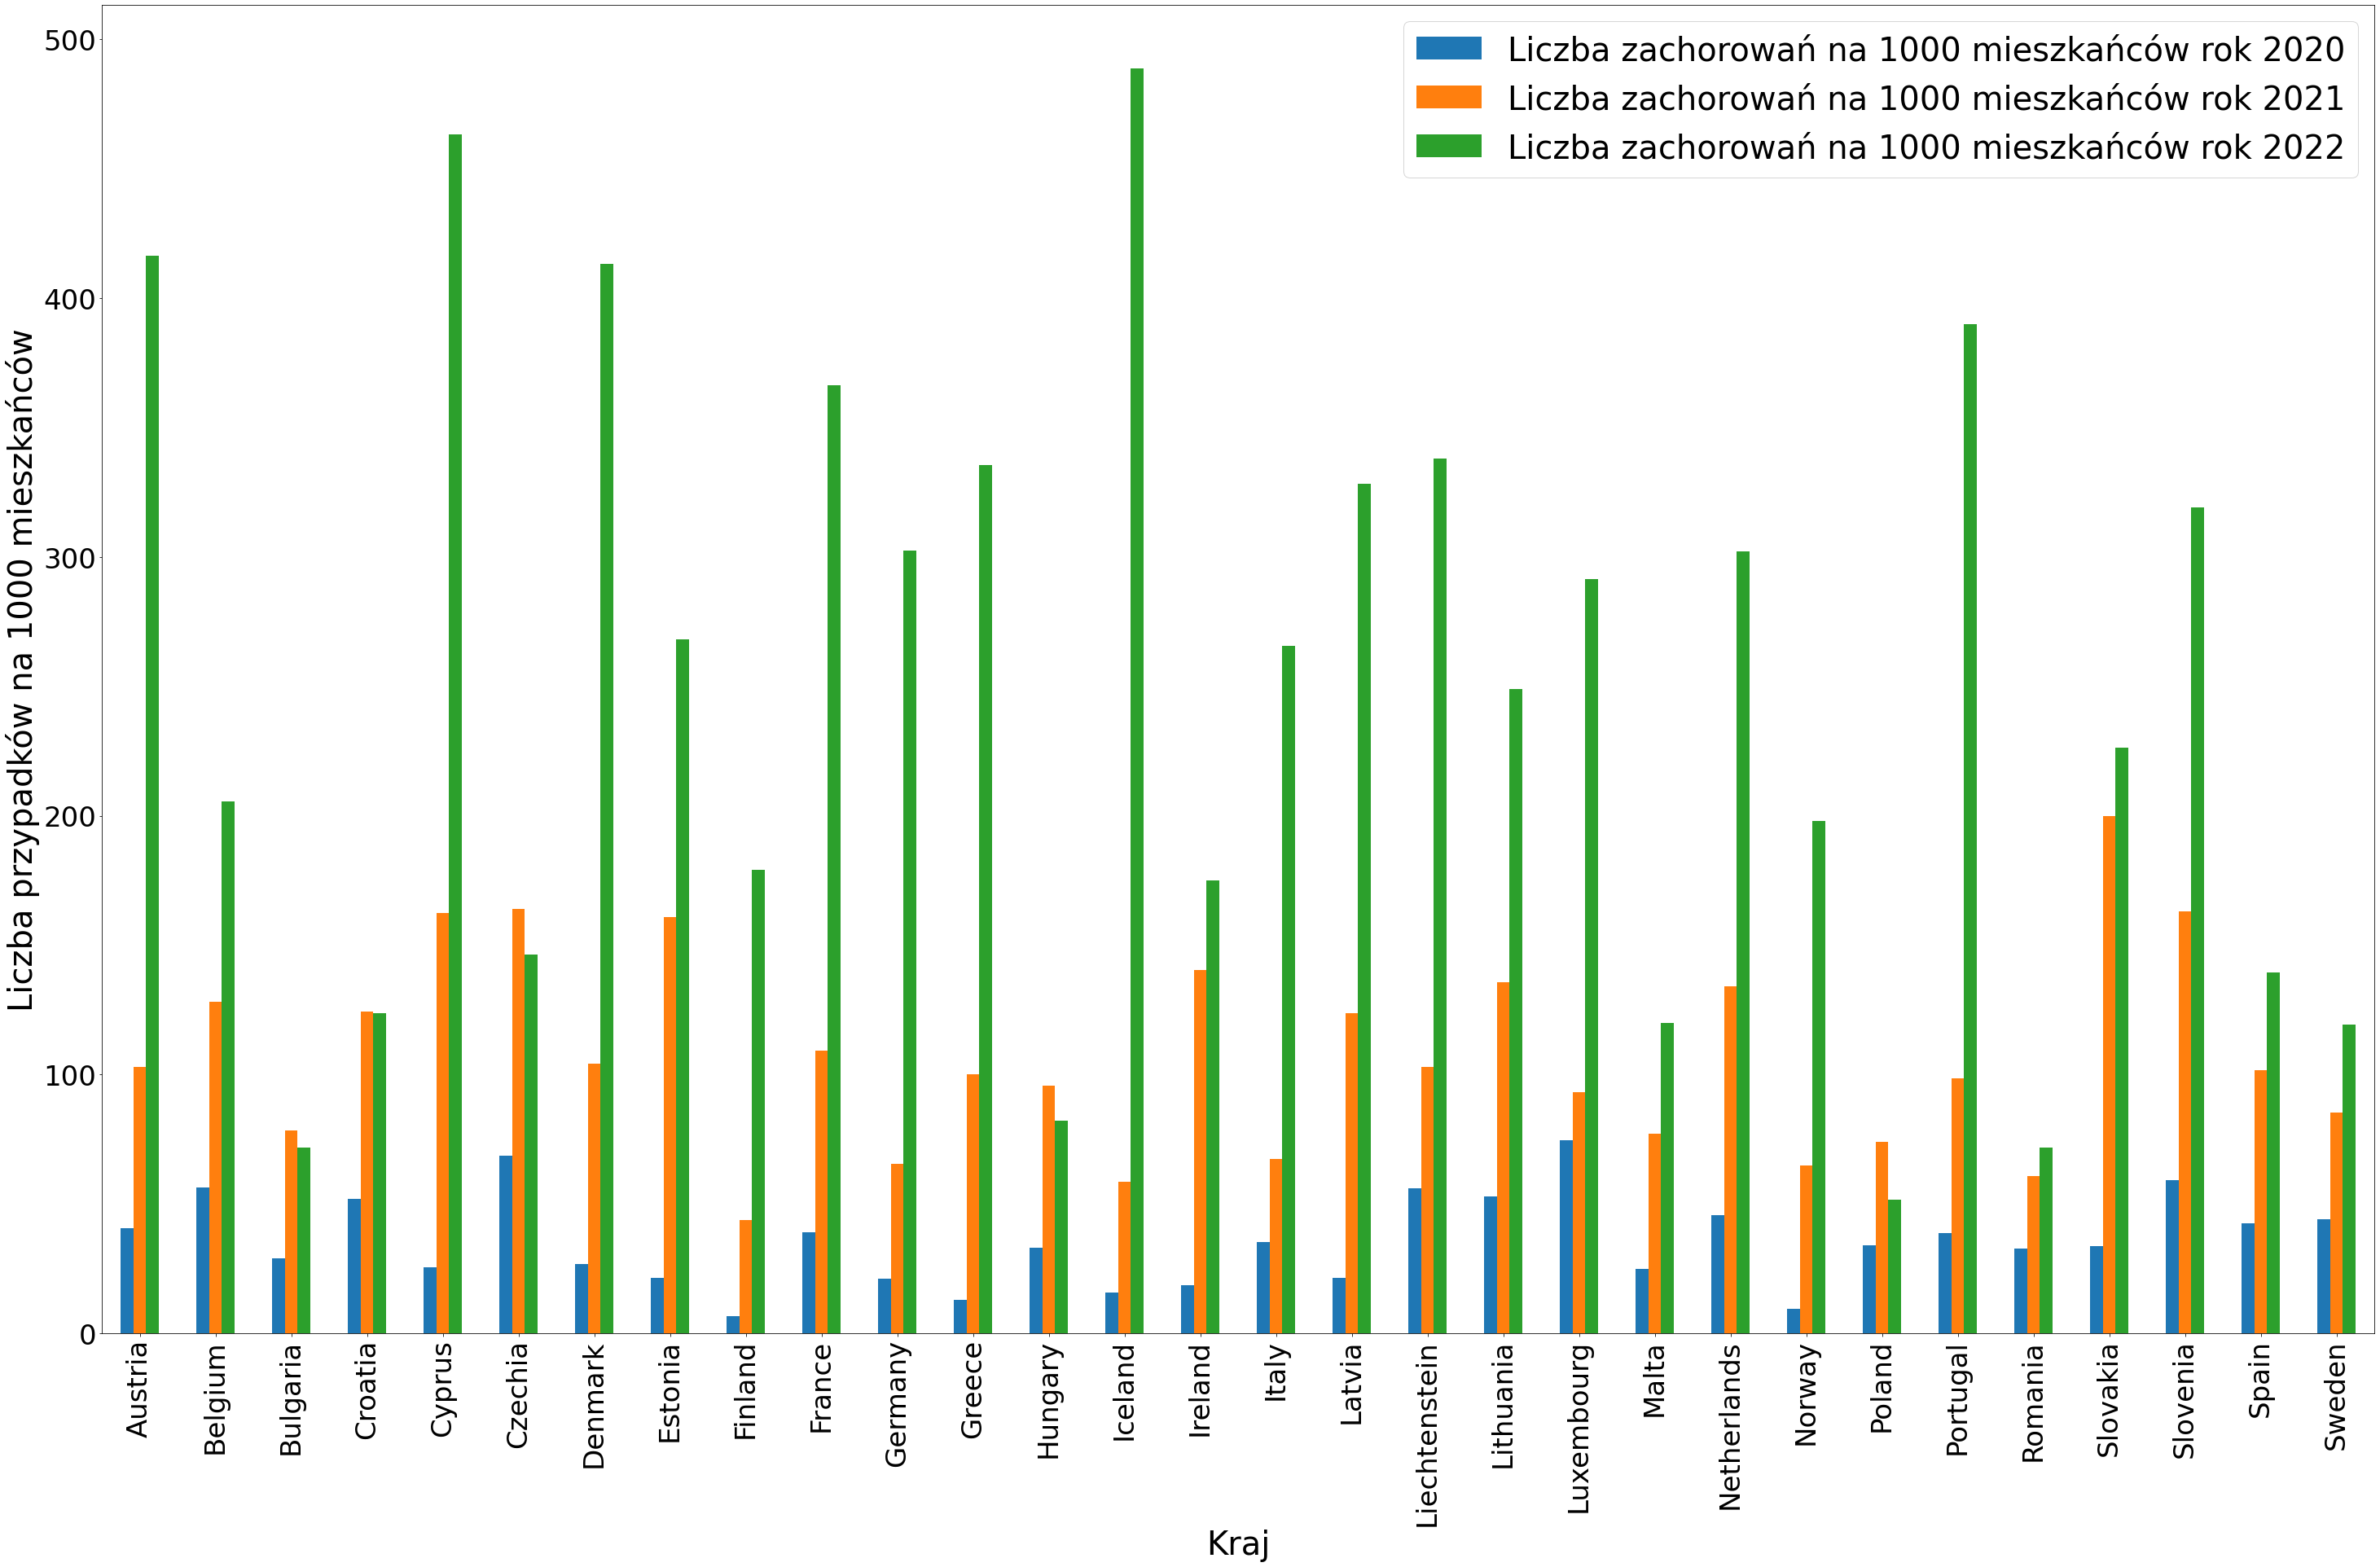

In [8]:
#stworzenie plot przedstawiajacego liczbe zachorowan na 1000 mieszkancow w latach 2020-2022
AllCovid.plot(x='countriesAndTerritories',y=['casesper1k20','casesper1k21','casesper1k22'],kind='bar',figsize=(50,30))
plt.xlabel('Kraj')
plt.ylabel('Liczba przypadków na 1000 mieszkańców')
plt.xticks(fontsize=34)
plt.yticks(fontsize=34)
axes = plt.gca()
plt.legend(['Liczba zachorowań na 1000 mieszkańców rok 2020', 'Liczba zachorowań na 1000 mieszkańców rok 2021','Liczba zachorowań na 1000 mieszkańców rok 2022'], fontsize=40)
axes.xaxis.label.set_size(40)
axes.yaxis.label.set_size(40)

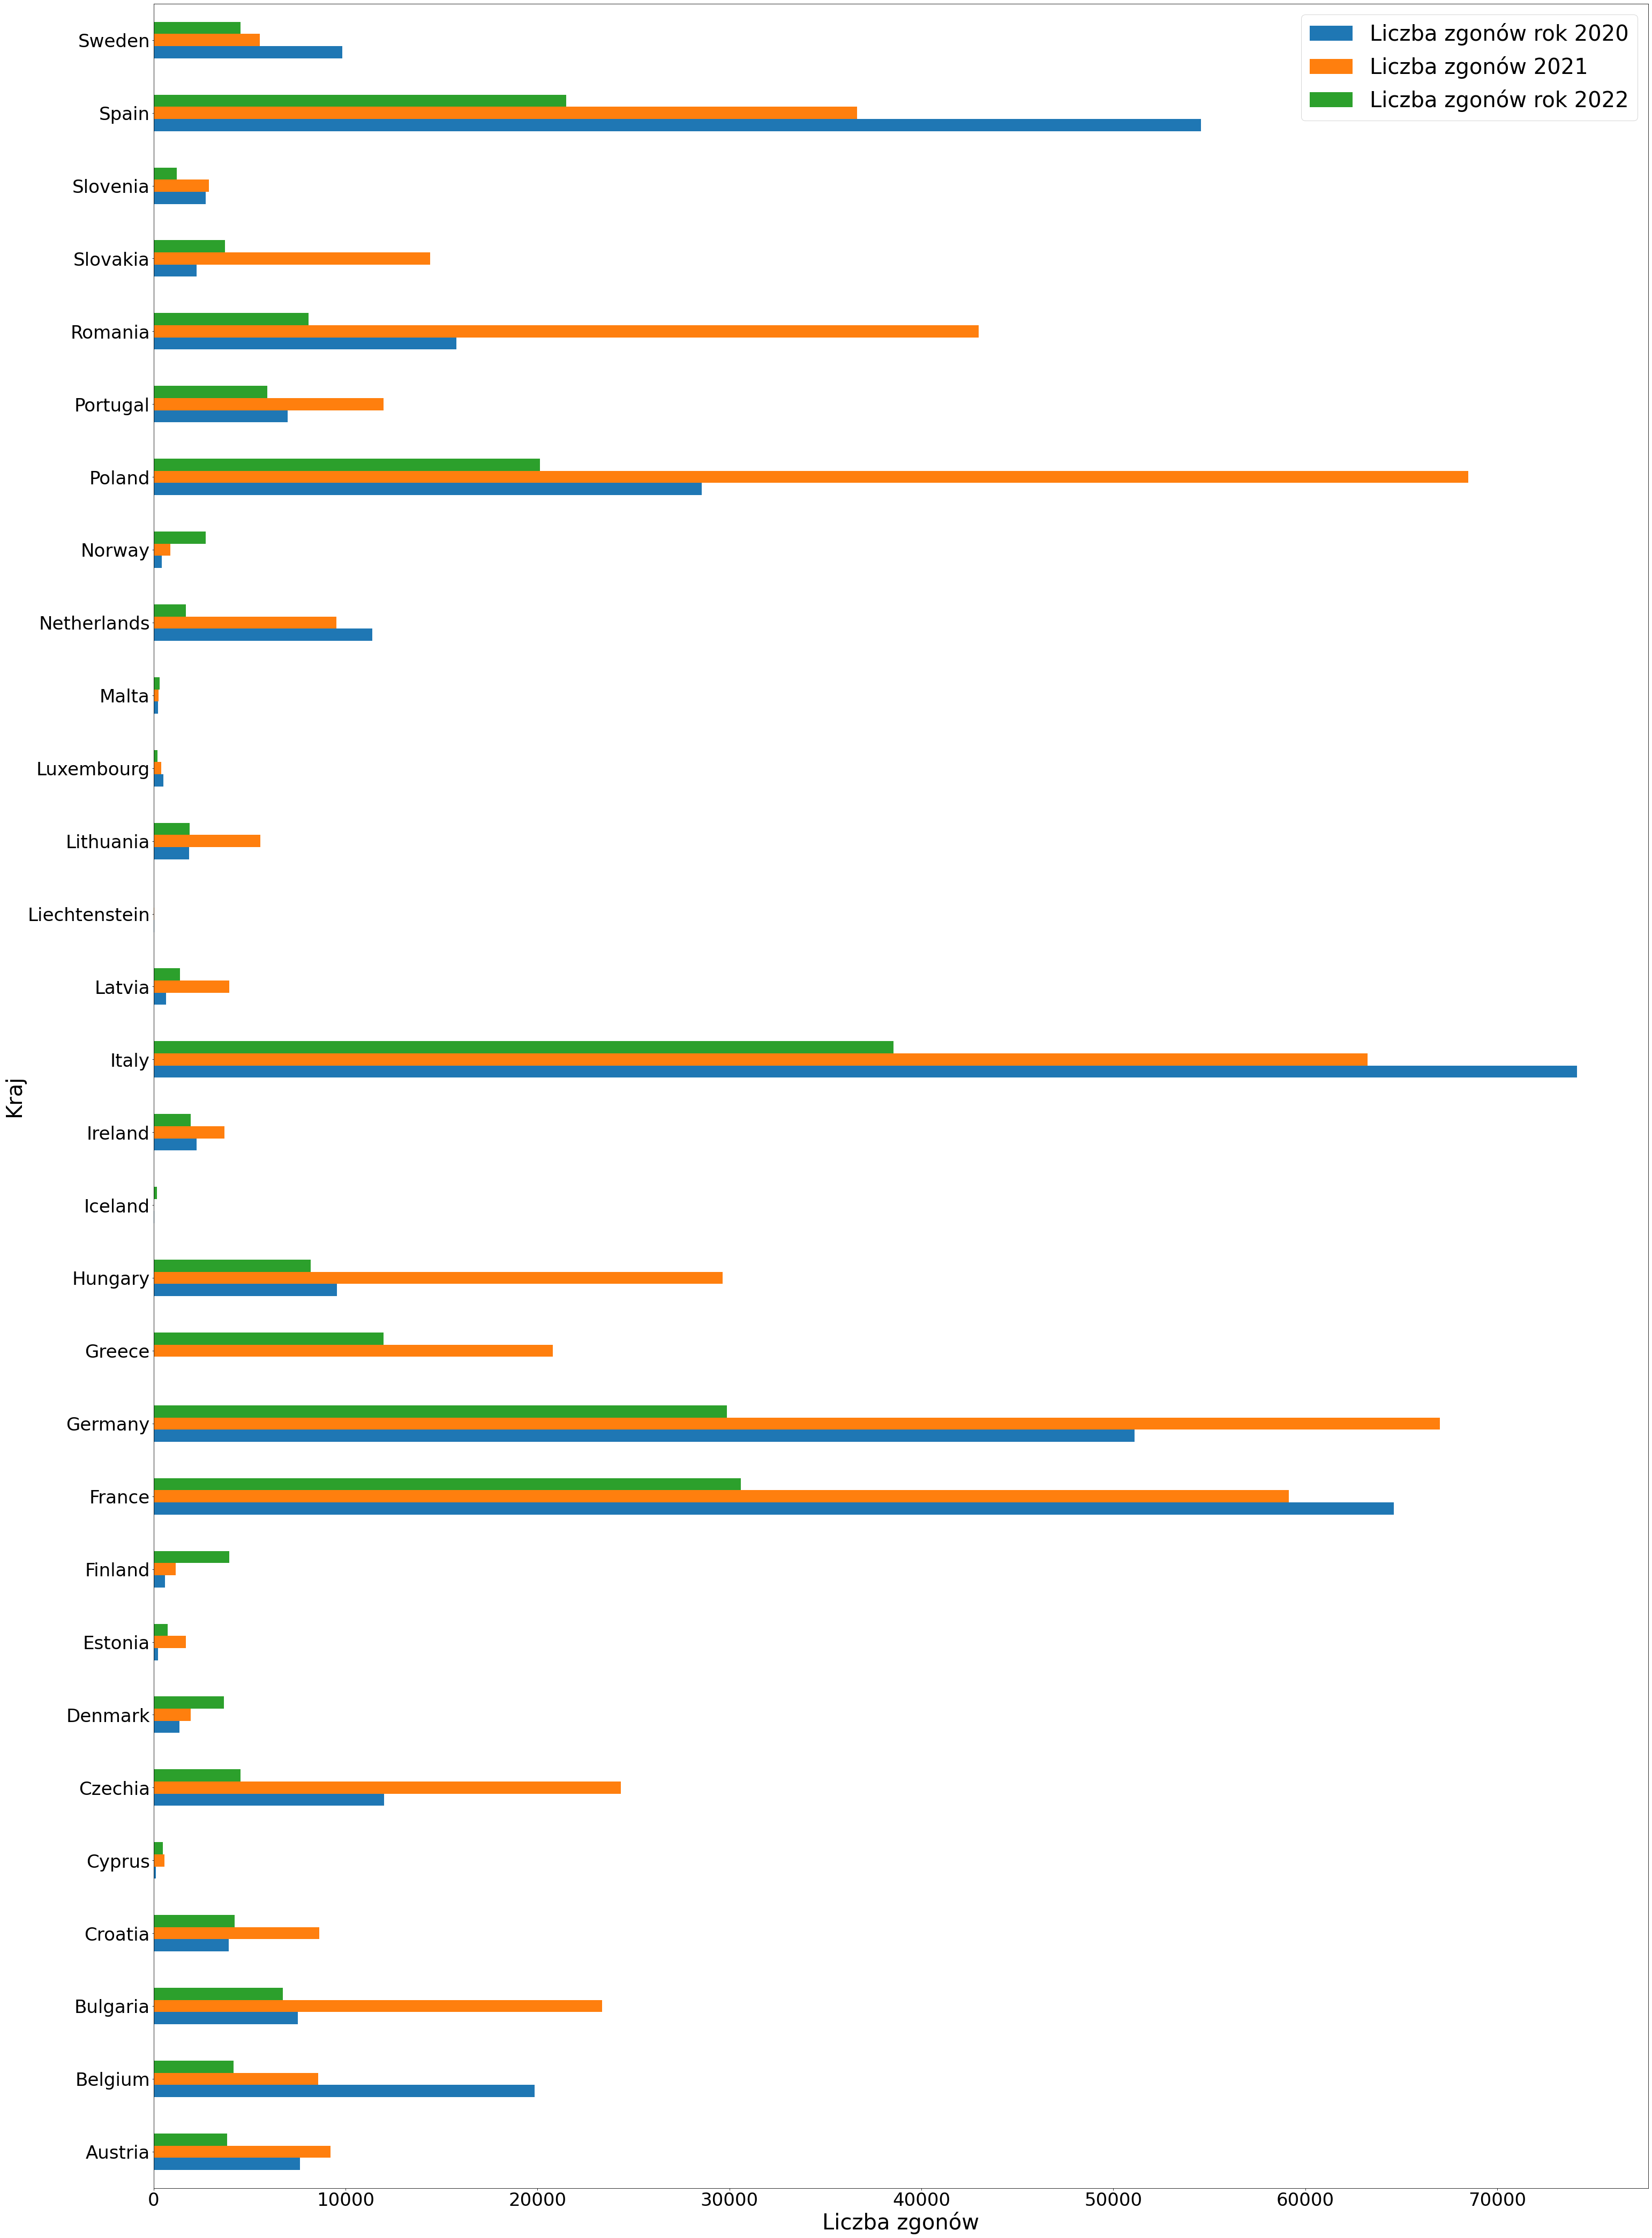

In [24]:
#stworzenie plot przedstawiajacego liczbe wszystkich zgonow na covida w Europie w latach 2020-2022
AllCovid.plot(x='countriesAndTerritories',y=['deaths_x','deaths_y','deaths'],kind='barh',figsize=(50,75))
plt.xlabel('Liczba zgonów')
plt.ylabel('Kraj')
plt.xticks(fontsize=34)
plt.yticks(fontsize=34)
axes = plt.gca()
plt.legend(['Liczba zgonów rok 2020', 'Liczba zgonów 2021','Liczba zgonów rok 2022'], fontsize=40)
axes.xaxis.label.set_size(40)
axes.yaxis.label.set_size(40)

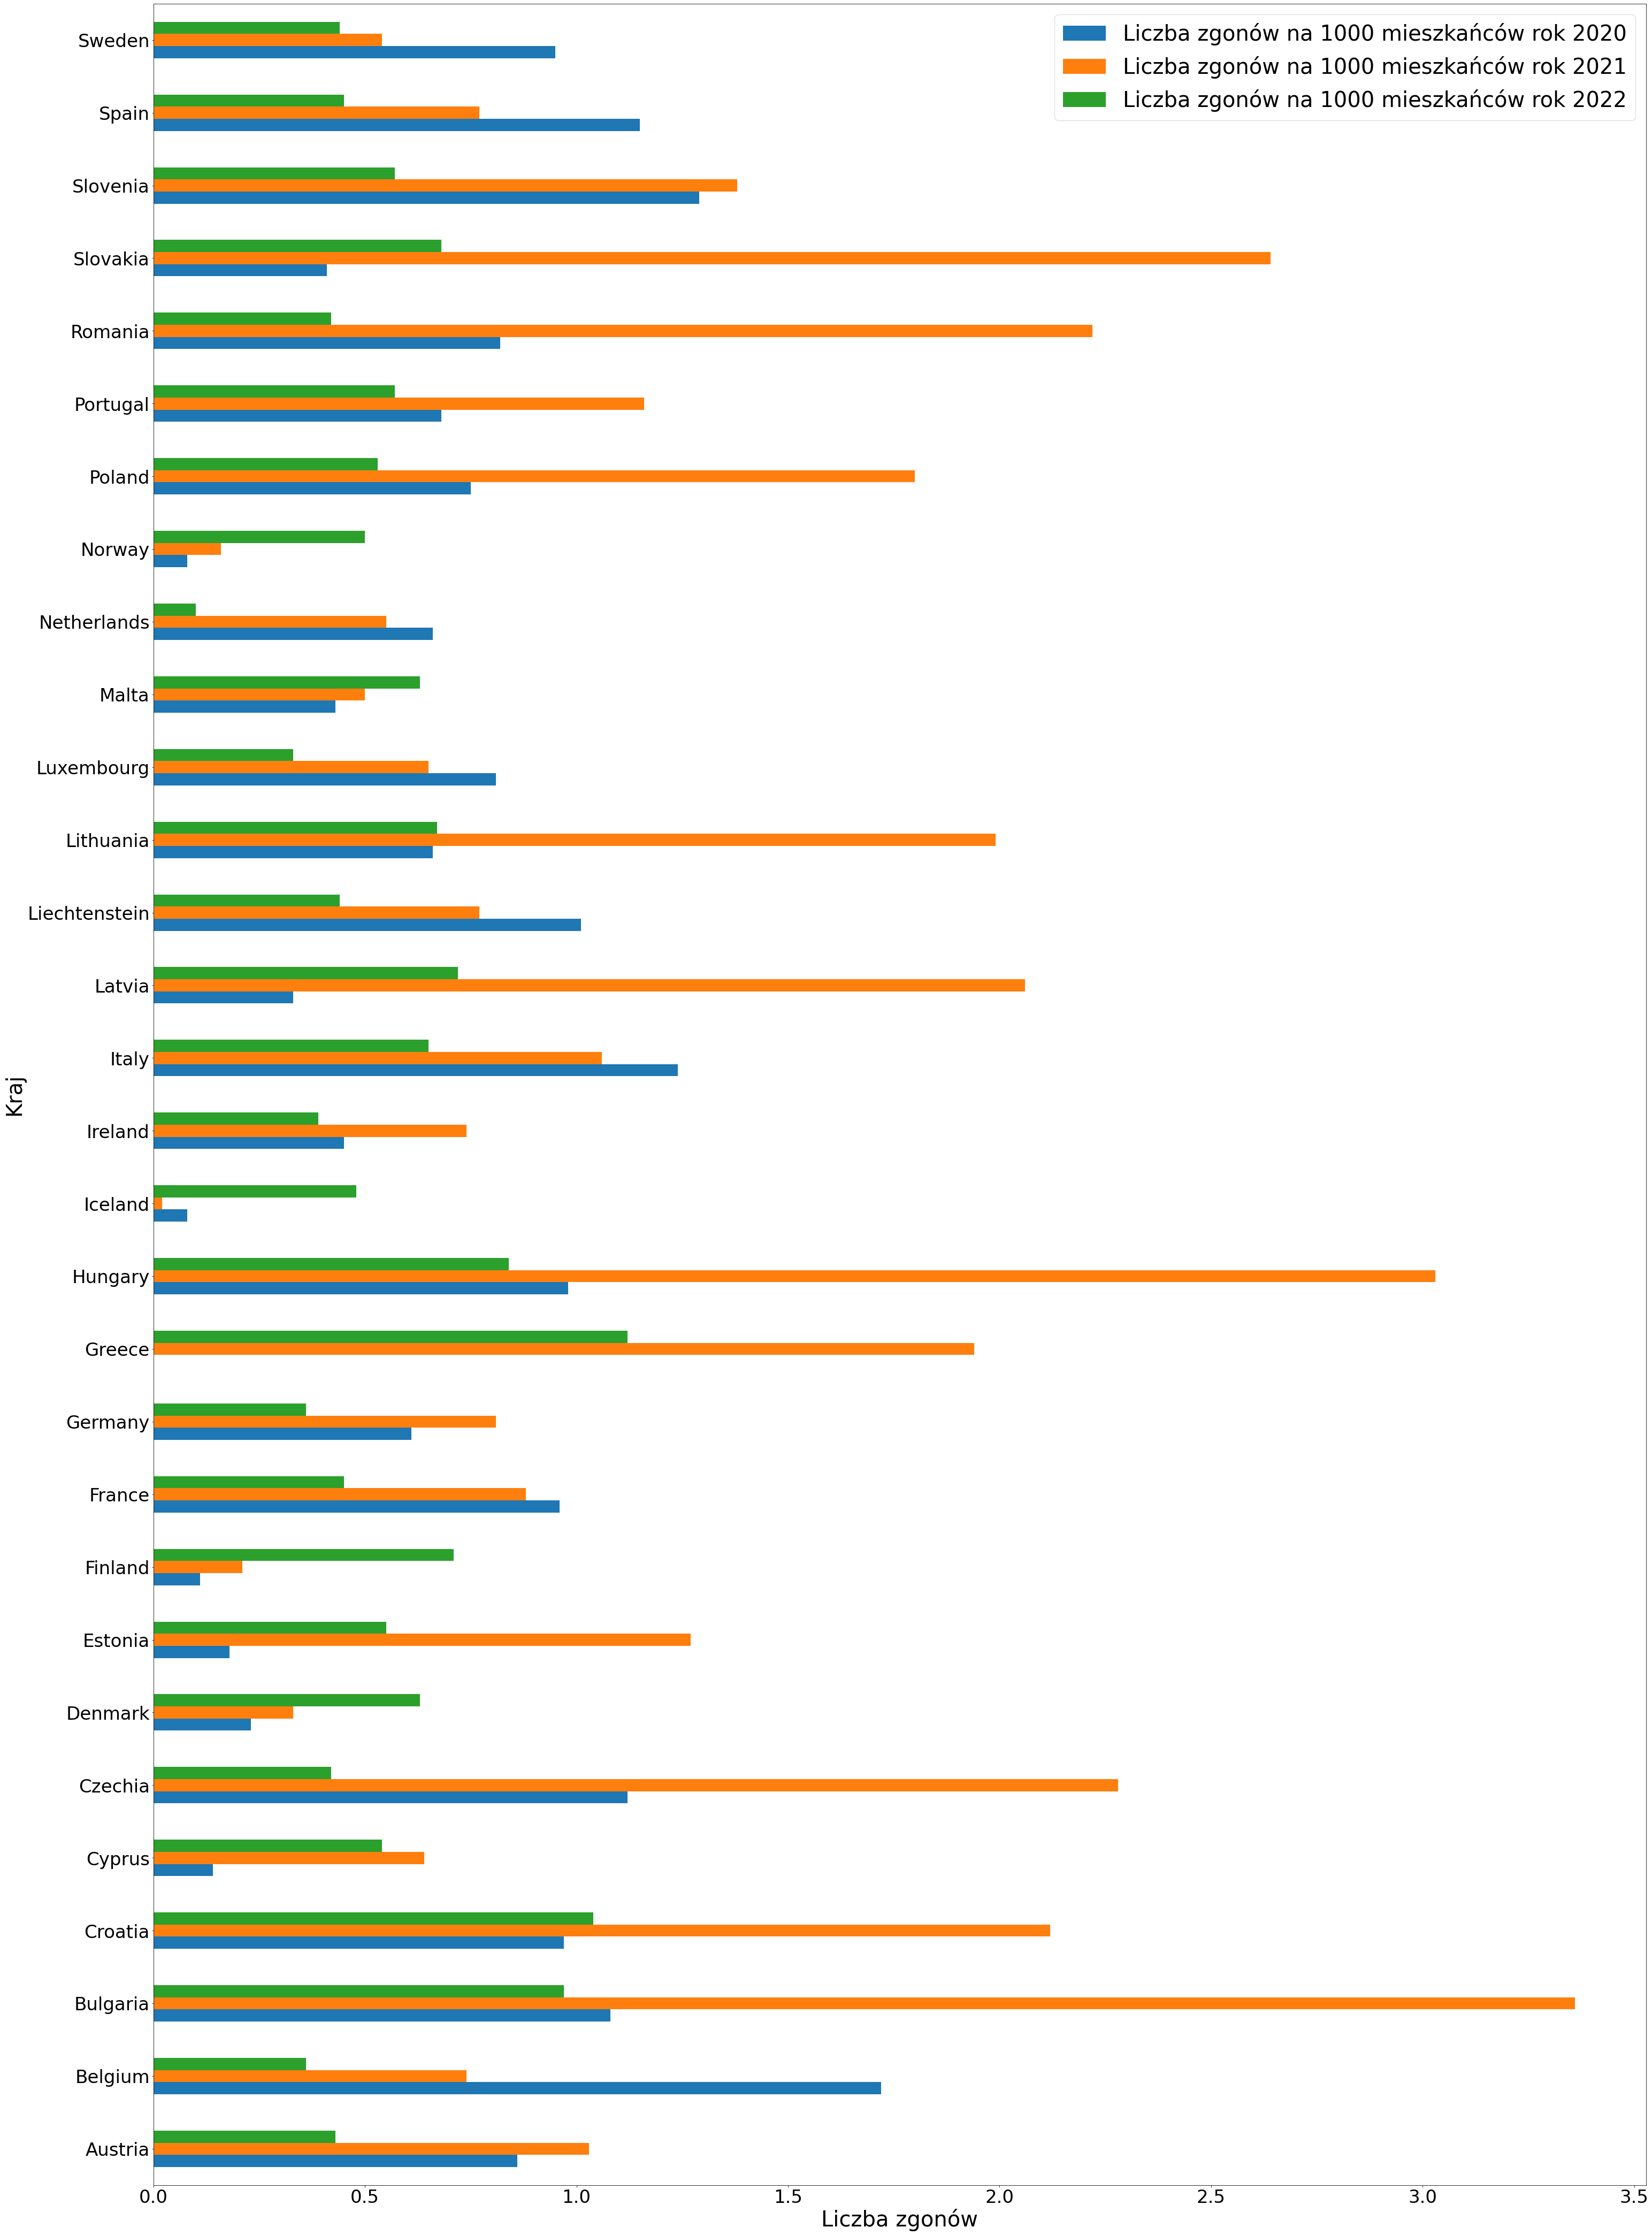

In [26]:
#stworzenie plot przedstawiajacego liczbe  zgonow na covida przypadających na 1000 mieszkańców w Europie w latach 2020-2022
AllCovid.plot(x='countriesAndTerritories',y=['deathper1k20','deathper1k21','deathper1k22'],kind='barh',figsize=(50,75))
plt.xlabel('Liczba zgonów')
plt.ylabel('Kraj')
plt.xticks(fontsize=34)
plt.yticks(fontsize=34)
axes = plt.gca()
plt.legend(['Liczba zgonów na 1000 mieszkańców rok 2020', 'Liczba zgonów na 1000 mieszkańców rok 2021','Liczba zgonów na 1000 mieszkańców rok 2022'], fontsize=40)
axes.xaxis.label.set_size(40)
axes.yaxis.label.set_size(40)